# ITU BLG453E (computer vision) - HW1

---
**Student:** Emil Huseynov  

**Student_ID:** 150210906

**Subject:** BLG453E

**Assignment:** HW1  

**Date:** 02.11.2024

**Due_date:** 14.11.2024

---

In [20]:
!pip install SimpleITK
#Intro: importing all the necessary libraries.
import SimpleITK as sitk
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tifffile as tiff

In [21]:
#going into required path
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')


#Q1 (15 pts) - Where are the bones?
## Gamma Correction on Medical Images

This code demonstrates gamma correction on a CT scan image using SimpleITK and Matplotlib. It includes:
1. **Reading and Normalizing the Image**: The image is read and normalized for further processing.
2. **Applying Gamma Correction**: Using a scaling constant `A = 1` and gamma value `γ = 0.28`, the image is gamma corrected to adjust brightness.
3. **Displaying Results**: Both the original and gamma-corrected images are displayed side by side.

### Code:


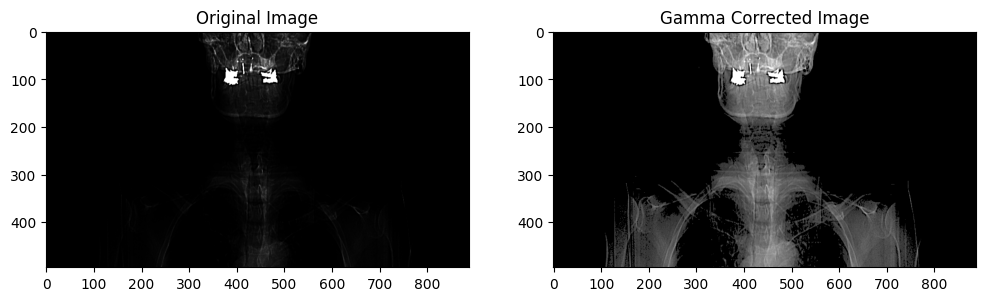

In [22]:
#Q1
image = sitk.ReadImage('Data/CT.tif')
image_array = sitk.GetArrayFromImage(image)

# Normalizing the image
image_normalized = image_array / np.max(image_array)

A = 1 #scaling constant, set to 1 for simplicity
gamma = 0.28  #Gamma
gamma_corrected = A*np.power(image_normalized, gamma)

# Scale to 8-bit and convert to uint8 for display
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

# Display original
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

# Display gamma corrected image
plt.subplot(1, 2, 2)
plt.title("Gamma Corrected Image")
plt.imshow(gamma_corrected, cmap='gray')

plt.show()

#Q2 (15 pts) - Glioblastoma
## Intensity Stretching on CT Brain Image

This code performs intensity stretching on a CT brain scan image to enhance contrast by spreading out intensity values. The steps include:
1. **Loading the CT Brain Image**: The image is loaded and converted into an array for manipulation.
2. **Calculating Intensity Range**: The minimum and maximum intensity values are identified and printed.
3. **Applying Intensity Stretching**: Using the intensity range, values are stretched to cover the full 8-bit range (0–255).
4. **Displaying Results**: The original and intensity-stretched images are displayed side by side for comparison.

### Code:


Minimum Intensity: 30
Maximum Intensity: 150


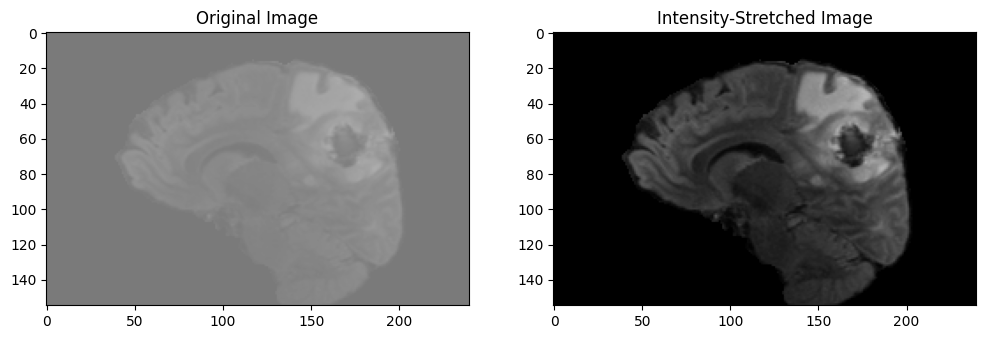

In [23]:
#Q2
# Load the CT brain image
image = sitk.ReadImage('Data/CT_brain.tif')
image_array = sitk.GetArrayFromImage(image)


min_intensity = np.min(image_array)
max_intensity = np.max(image_array)
print(f"Minimum Intensity: {min_intensity}")
print(f"Maximum Intensity: {max_intensity}")


# Perform intensity stretching
stretched_image = ((image_array - min_intensity) / (max_intensity - min_intensity)) * 255
stretched_image = stretched_image.astype(np.uint8)  # Convert to 8-bit format

plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

# Display the stretched image
plt.subplot(1, 2, 2)
plt.title("Intensity-Stretched Image")
plt.imshow(stretched_image, cmap='gray')

plt.show()


#Q3 (30 pts) - Hidden Paths Underneath
## Digital Subtraction and Masking for Blood Vessel Isolation

This code isolates blood vessels in medical images through digital subtraction, contrast enhancement, and masking. The main steps are:
1. **Loading Images**: Both mask and contrast images are loaded in grayscale.
2. **Digital Subtraction**: The mask image is subtracted from the contrast image to enhance blood vessels.
3. **Contrast Enhancement with CLAHE**: CLAHE (Contrast Limited Adaptive Histogram Equalization) is applied to improve vessel visibility.
4. **Binary Mask Creation**: Otsu's thresholding converts the enhanced image into a binary mask.
5. **Mask Cleanup**: Morphological operations fill small holes in the binary mask.
6. **Inverting the Mask**: The binary mask is inverted for better visualization.

### Code:


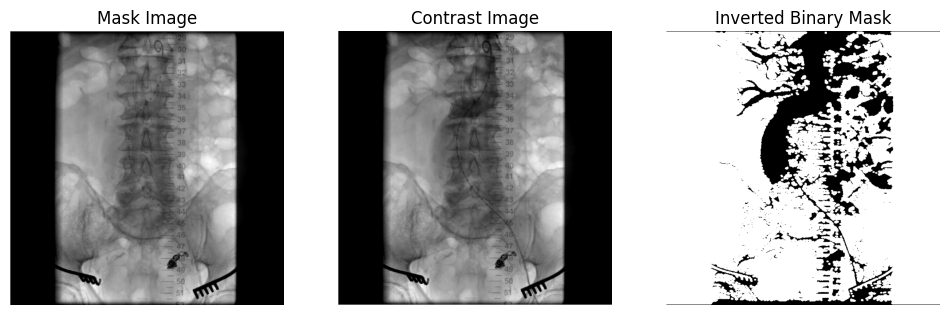

In [24]:
#Q3
# Load the mask and contrast images in grayscale
mask_image = cv2.imread('Data/mask.tif', cv2.IMREAD_GRAYSCALE)
contrast_image = cv2.imread('Data/contrast.tif', cv2.IMREAD_GRAYSCALE)

# Step 1: Perform digital subtraction
# Subtract the mask image from the contrast image to isolate blood vessels
subtracted_image = cv2.absdiff(contrast_image, mask_image)

# Step 2: Enhance contrast using CLAHE
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(subtracted_image)

# Step 3: Apply binary thresholding to create a binary mask
# Otsu's thresholding automatically determines the best threshold value
_, binary_mask = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Clean up the binary mask using morphological operations
# Use a small elliptical kernel to perform a closing operation (to fill small holes)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

# Step 5: Invert the binary mask image
inverted_mask = cv2.bitwise_not(cleaned_mask)

# Step 6: Display the results
# Display each stage for visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Mask Image")
plt.imshow(mask_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Contrast Image")
plt.imshow(contrast_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Inverted Binary Mask")
plt.imshow(inverted_mask, cmap='gray')
plt.axis("off")

plt.show()

#Q4 (40 pts) - Focus Stacking
## Image Alignment, Focus Stacking, and Overlay for Enhanced Visualization

This code demonstrates advanced techniques in image processing, including image alignment, focus stacking, and overlaying for scientific imaging purposes. The key components and functions are outlined below:

## Part 1: Image Alignment and First Focus Stacking Method
- **Alignment Function (align_images_first)**: Aligns two images based on ORB (Oriented FAST and Rotated BRIEF) feature matching. Key points are detected and matched between the two images, and a homography transformation is applied to align `img1` to `img2`.
- **Focus Stacking (focus_stack_tif_first)**: Loads two TIF images, aligns them if necessary, and uses Laplacian filtering to determine the regions of each image with the highest clarity. The sharper regions are merged to produce a single, in-focus output image.

## Part 2: Alternative Image Alignment and Focus Stacking Method
- **Alternative Alignment Function (align_images_second)**: Provides an option for alignment using either ORB or SIFT (Scale-Invariant Feature Transform) based on feature matching. This function attempts ORB first, and if it fails due to insufficient matches, it switches to SIFT for robust alignment.
- **Focus Stacking (focus_stack_tif_second)**: Similar to the first method, but includes thresholding and binary mask generation to enhance areas of focus and sharpen the final image. The output is saved as a focused, merged TIF image.

## Part 3: Overlaying Images with a Mask
- **Overlay Function (overlay_images_with_mask)**: Combines two images by masking out specific regions in the foreground image to blend seamlessly with the background. A black mask is generated to isolate and overlay regions of interest from the foreground onto the background image.

## Final Visualization
The last section demonstrates how to read, stack, and visualize the processed images:
- **First part**: Displays the focus-stacked result from the first method.
- **Second part**: Shows the result from the second focus stacking method.
- **Final overlay**: Combines both focus-stacked images into a single overlay, creating a composite image for enhanced analysis.

### Code:


Image saved as focus_output.tif
Image saved as focus_output2.tif
Final image saved as Finaloutput.tif


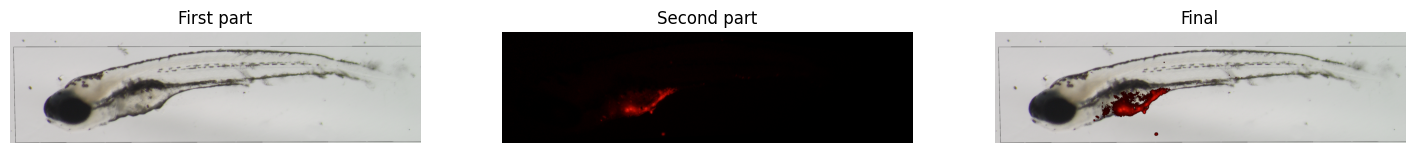

In [36]:
# Q4
# Part 1: Import Libraries and Define First Alignment and Focus Stacking Functions

# Define the first alignment function that aligns two images based on keypoint matches
def align_images_first(img1, img2):
    # Convert both images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector with 5000 features
    orb = cv2.ORB_create(5000)

    # Detect and compute keypoints and descriptors for both images
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Use BFMatcher with Hamming distance and cross-check filtering
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(descriptors1, descriptors2)

    # Sort matches by their distance (quality of match)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract matched keypoints in both images
    points1 = np.array([keypoints1[m.queryIdx].pt for m in matches], dtype=np.float32)
    points2 = np.array([keypoints2[m.trainIdx].pt for m in matches], dtype=np.float32)

    # Compute homography matrix for warping
    H, _ = cv2.findHomography(points1, points2, cv2.RANSAC)
    height, width = img2.shape[:2]

    # Warp img1 to align with img2 based on homography
    aligned_img1 = cv2.warpPerspective(img1, H, (width, height))
    return aligned_img1

# Define the first focus stacking function
def focus_stack_tif_first(image1_path, image2_path, output_path="focus_output.tif"):
    # Read images from the provided paths
    img1 = tiff.imread(image1_path)
    img2 = tiff.imread(image2_path)

    # Resize img1 to match img2 dimensions if needed
    if img1.shape != img2.shape:
        img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

    # Align img1 to img2 using the alignment function
    img1_aligned = align_images_first(img1, img2)

    # Convert both aligned images to grayscale for sharpness comparison
    gray1 = cv2.cvtColor(img1_aligned, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute Laplacian (sharpness measure) for both images
    laplacian1 = cv2.Laplacian(gray1, cv2.CV_64F)
    laplacian2 = cv2.Laplacian(gray2, cv2.CV_64F)
    abs_laplacian1 = np.abs(laplacian1)
    abs_laplacian2 = np.abs(laplacian2)

    # Create a mask where img1 is sharper than img2
    mask1 = abs_laplacian1 > abs_laplacian2
    mask1 = mask1.astype(np.uint8)
    mask1 = np.stack([mask1] * img1.shape[2], axis=-1) if img1.ndim == 3 else mask1

    # Combine images based on sharpness mask
    focus_stacked = np.where(mask1 == 1, img1_aligned, img2)

    # Save the output focus-stacked image
    tiff.imwrite(output_path, focus_stacked)
    print(f"Image saved as {output_path}")

# Part 2: Define Second Alignment and Focus Stacking Functions

# Define a second alignment function with option to use SIFT or ORB
def align_images_second(img1, img2, use_sift=False):
    # Convert both images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Use SIFT or ORB based on use_sift parameter
    if use_sift:
        sift = cv2.SIFT_create()
        keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
        keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)
    else:
        orb = cv2.ORB_create(10000)
        keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
        keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Choose matcher type based on the detector
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) if not use_sift else cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = matcher.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Ensure enough matches are found
    if len(matches) < 4:
        raise ValueError("Not enough matches to compute homography.")

    # Extract matched keypoints
    points1 = np.array([keypoints1[m.queryIdx].pt for m in matches], dtype=np.float32)
    points2 = np.array([keypoints2[m.trainIdx].pt for m in matches], dtype=np.float32)
    H, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    # Warp img2 to align with img1
    height, width = img1.shape[:2]
    aligned_img2 = cv2.warpPerspective(img2, H, (width, height))

    return aligned_img2

# Second focus stacking function with different approach
def focus_stack_tif_second(image1_path, image2_path, output_path="focus_output2.tif"):
    # Read images from the provided paths
    img1 = cv2.imread(image1_path, cv2.IMREAD_UNCHANGED)
    img2 = cv2.imread(image2_path, cv2.IMREAD_UNCHANGED)

    # Try alignment with ORB; switch to SIFT if needed
    try:
        img2_aligned = align_images_second(img1, img2)
    except ValueError:
        print("ORB alignment failed, switching to SIFT.")
        img2_aligned = align_images_second(img1, img2, use_sift=True)

    # Convert aligned images to grayscale and threshold
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2_aligned, cv2.COLOR_BGR2GRAY)
    _, gray1_thresh = cv2.threshold(gray1, 50, 255, cv2.THRESH_BINARY)
    _, gray2_thresh = cv2.threshold(gray2, 50, 255, cv2.THRESH_BINARY)

    # Compute Laplacian and absolute values for sharpness comparison
    laplacian1 = cv2.Laplacian(gray1_thresh, cv2.CV_64F)
    laplacian2 = cv2.Laplacian(gray2_thresh, cv2.CV_64F)
    abs_laplacian1 = np.abs(laplacian1)
    abs_laplacian2 = np.abs(laplacian2)

    # Create mask and perform focus stacking
    mask1 = abs_laplacian1 > abs_laplacian2
    mask1 = mask1.astype(np.uint8)
    mask1 = np.stack([mask1] * img1.shape[2], axis=-1) if img1.ndim == 3 else mask1

    # Generate the focus-stacked result
    focus_stacked = np.where(mask1 == 1, img1, img2_aligned)
    focus_stacked = cv2.cvtColor(focus_stacked, cv2.COLOR_BGR2RGB)

    # Save the focus-stacked image
    tiff.imwrite(output_path, focus_stacked)
    print(f"Image saved as {output_path}")

# Part 3: Define Overlay Function and Execute Overlay

# Overlay function to merge images by masking out black areas
def overlay_images_with_mask(foreground_path, background_path, output_path="Finaloutput.tif"):
    # Read foreground and background images
    foreground = tiff.imread(foreground_path)
    background = tiff.imread(background_path)

    # Resize foreground to match background dimensions if needed
    if foreground.shape[:2] != background.shape[:2]:
        foreground = cv2.resize(foreground, (background.shape[1], background.shape[0]))

    # Define color range for black background and create mask
    lower_black = np.array([0, 0, 0], dtype=np.uint8)
    upper_black = np.array([30, 30, 30], dtype=np.uint8)
    mask = cv2.inRange(foreground, lower_black, upper_black)

    # Invert the mask and remove background in the foreground image
    mask_inv = cv2.bitwise_not(mask)
    foreground_no_bg = cv2.bitwise_and(foreground, foreground, mask=mask_inv)
    background_masked = cv2.bitwise_and(background, background, mask=mask)

    # Overlay masked background and foreground images
    overlay_result = cv2.add(background_masked, foreground_no_bg)

    # Save the final overlay image
    tiff.imwrite(output_path, overlay_result)
    print(f"Final image saved as {output_path}")

# Execute focus stacking and overlay functions with provided image paths
focus_stack_tif_first("Data/bf_7.tif", "Data/bf_5.tif", "focus_output.tif")
focus_stack_tif_second("Data/RFP_5.tif", "Data/RFP_7.tif", "focus_output2.tif")
overlay_images_with_mask("focus_output2.tif", "focus_output.tif", "Finaloutput.tif")

# Display the focus-stacked and final overlay images using SimpleITK and Matplotlib
first = sitk.ReadImage('focus_output.tif')
second = sitk.ReadImage('focus_output2.tif')
Finalphoto = sitk.ReadImage('Finaloutput.tif')

# Convert images to NumPy arrays for visualization
first_np = sitk.GetArrayFromImage(first)
second_np = sitk.GetArrayFromImage(second)
final_np = sitk.GetArrayFromImage(Finalphoto)

# Plot each image in a subplot for side-by-side comparison
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("First part")
plt.imshow(first_np, cmap='gray')
plt.axis('off')  # Hide axis numbers

plt.subplot(1, 3, 2)
plt.title("Second part")
plt.imshow(second_np, cmap='gray')
plt.axis('off')  # Hide axis numbers

plt.subplot(1, 3, 3)
plt.title("Final")
plt.imshow(final_np, cmap='gray')
plt.axis('off')  # Hide axis numbers

plt.show()
